<a href="https://colab.research.google.com/github/VedantGabhane/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Flowers Classification**

#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']

#**Reading Dataset**

In [3]:
#load the data
iris_data = pd.read_csv('/content/iris.data', names = columns)
iris_data.head(150)

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
rows, cols = iris_data.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 150
Number of columns: 5


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#**Visualization**

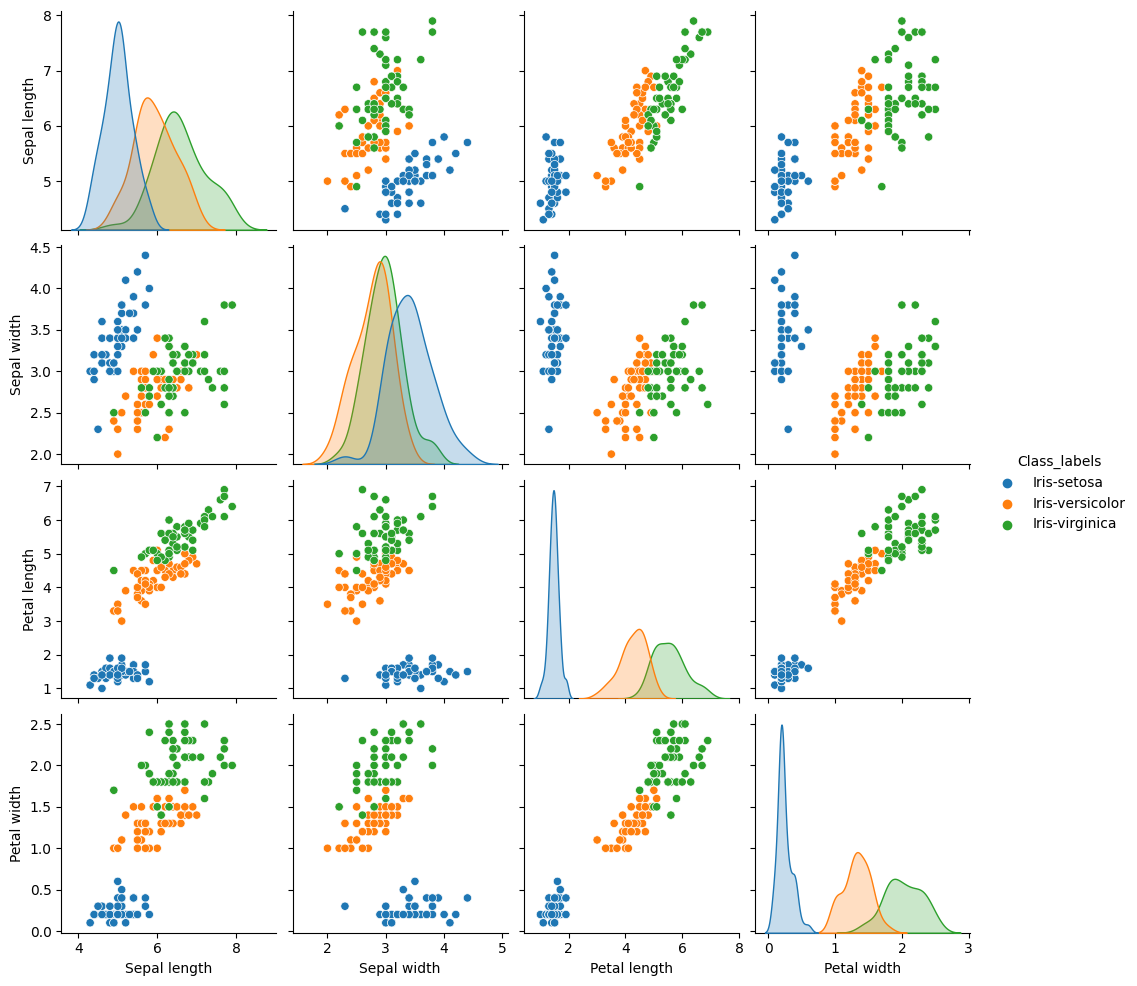

In [7]:
#visualize the whole dataset
sns.pairplot(iris_data, hue='Class_labels')

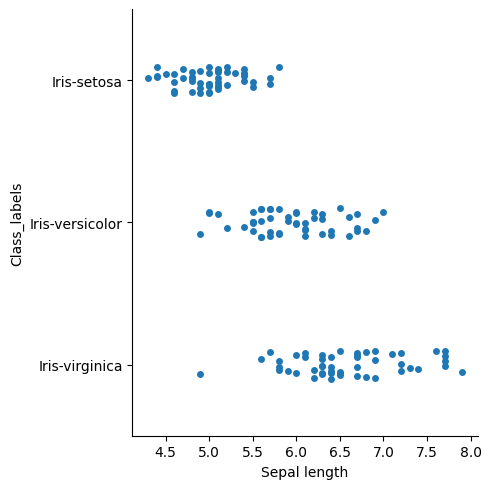

In [8]:
sns.catplot(y = iris_data['Class_labels'], x = iris_data['Sepal length'])

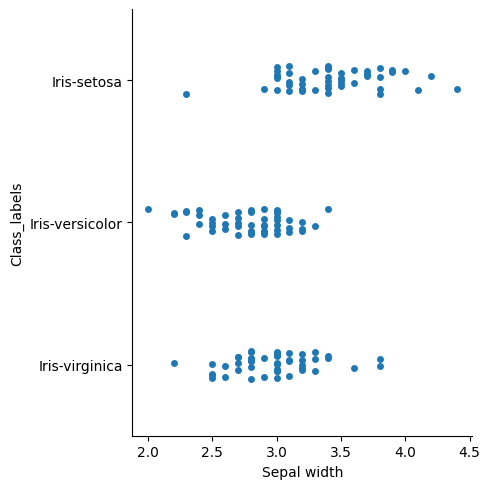

In [9]:
sns.catplot(y = iris_data['Class_labels'], x = iris_data['Sepal width'])

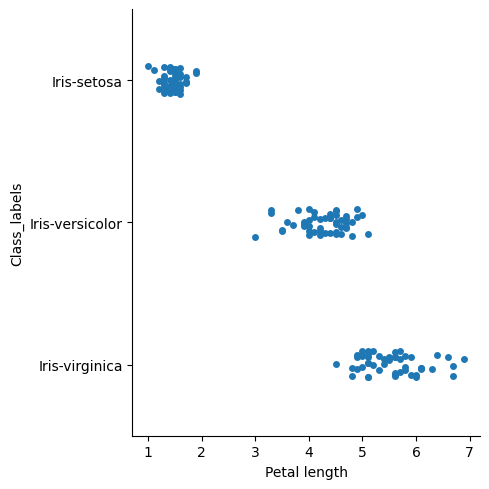

In [10]:
sns.catplot(y = iris_data['Class_labels'], x = iris_data['Petal length'])

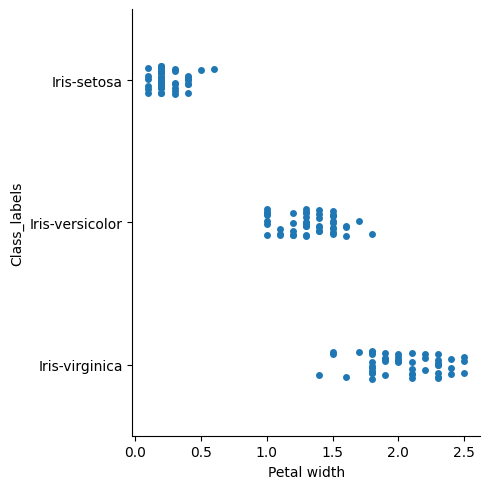

In [11]:
sns.catplot(y = iris_data['Class_labels'], x = iris_data['Petal width'])

<Axes: xlabel='Sepal length', ylabel='Class_labels'>

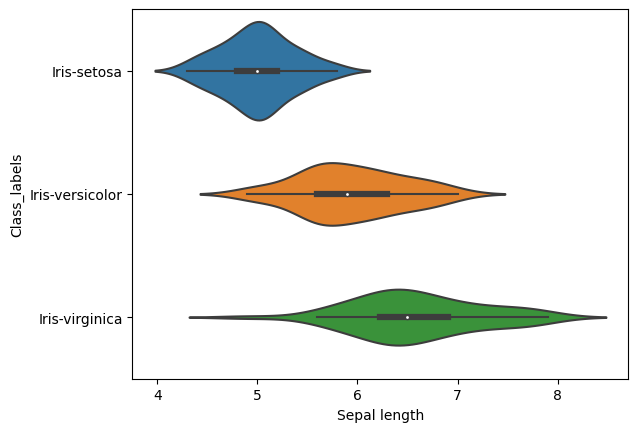

In [12]:
sns.violinplot(y = iris_data['Class_labels'], x = iris_data['Sepal length'])

<Axes: xlabel='Sepal width', ylabel='Class_labels'>

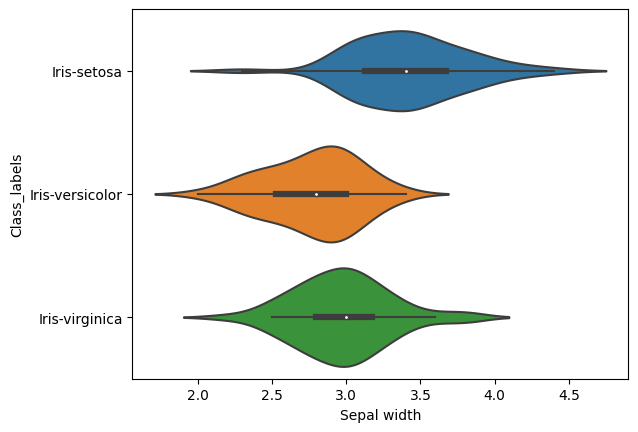

In [13]:
sns.violinplot(y = iris_data['Class_labels'], x = iris_data['Sepal width'])

<Axes: xlabel='Petal length', ylabel='Class_labels'>

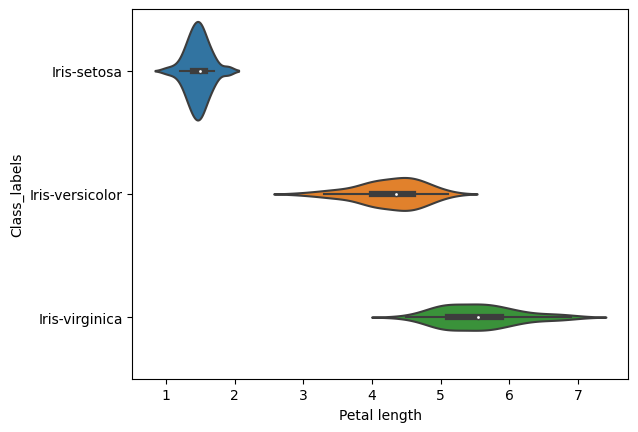

In [14]:
sns.violinplot(y = iris_data['Class_labels'], x = iris_data['Petal length'])

<Axes: xlabel='Petal width', ylabel='Class_labels'>

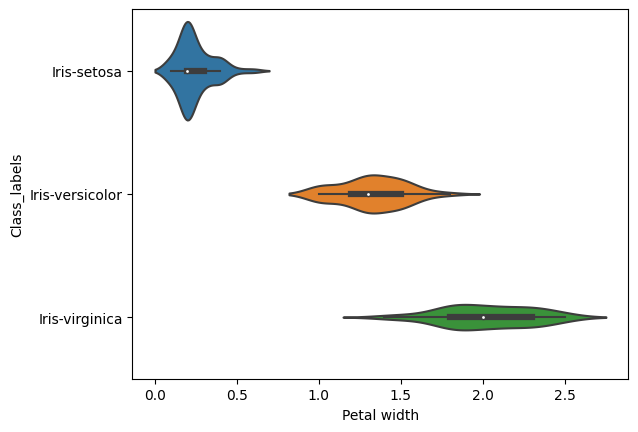

In [15]:
sns.violinplot(y = iris_data['Class_labels'], x = iris_data['Petal width'])

In [16]:
correlations = iris_data.corr(method='pearson')

<ipython-input-16-55042c6d9279>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = iris_data.corr(method='pearson')


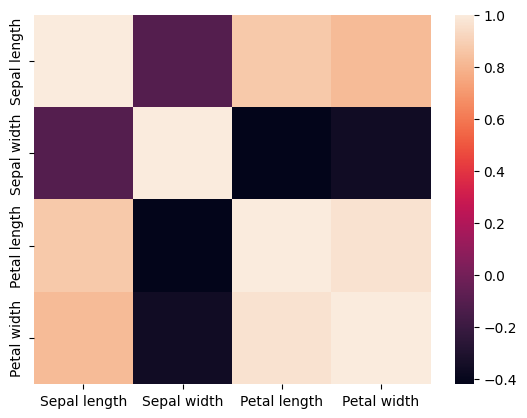

In [17]:
sns.heatmap(correlations)
plt.show()

In [18]:
X = iris_data.iloc[:, :-1]
y = iris_data.iloc[:, -1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Creating Classifier**

In [20]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [21]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [23]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


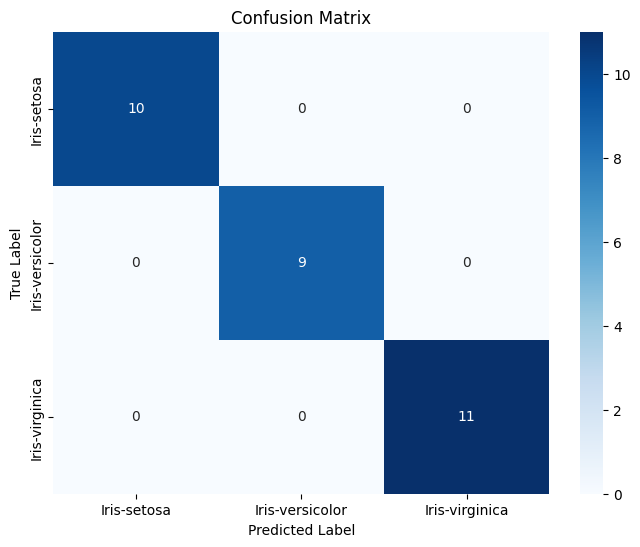

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris_data['Class_labels'].unique(),
            yticklabels=iris_data['Class_labels'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#**Predicting the Output**

In [25]:
input_data = []
print("Enter the values for Sepal length, Sepal width, Petal length, Petal width:")
for feature in X.columns:
    value = float(input(f"{feature}: "))
    input_data.append(value)

# Convert the input data to a DataFrame
input_sample = pd.DataFrame([input_data], columns=X.columns)

# Predict the output
predicted_output = classifier.predict(input_sample)

# Print the predicted output
print("Predicted Output:", predicted_output)

Enter the values for Sepal length, Sepal width, Petal length, Petal width:
Sepal length: 5
Sepal width: 3
Petal length: 4
Petal width: 2
Predicted Output: ['Iris-versicolor']
